**Classify the following attributes as binary, discrete, or continuous. Also classify them as qualitative
(nominal or ordinal) or quantitative (interval or ratio).**

(a) Time in terms of AM or PM - binary, nominal

(b) Brightness as measured by a light meter - continuous, ratio

(c) Brightness as measured by people’s judgments - discrete, ordinal

(d) Angles as measured in degrees between 00 and 3600 - continuous, ratio

(e) Bronze, Silver, and Gold medals as awarded at the Olympics - discrete, ordinal

(f) Height above sea level- continuous, interval/ratio (depends)

(g) Number of patients in a hospital - continuous, interval

(h) ISBN numbers for books. (Look up the format on the Web.) - discrete, nominal

(i) Ability to pass light in terms of the following values: opaque, translucent, transparent - discrete, nominal (order doesn't matter)

(j) Military rank - discrete, ordinal

(k) Distance from the center of campus - continuous, interval/ratio (depends)

(l) Density of a substance in grams per cubic centimeter - continuous, ratio

(m) Coat check number. (When you attend an event, you can often give your coat to someone who, in turn, gives you a number that you can use to claim your coat when you leave.) - discrete, nominal



---



In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# dependent variable: Species
# independent variable: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

In [9]:
df.shape

(150, 6)

In [10]:
df.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

In [11]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
for col in df.drop(['Id', 'Species'], axis=1):
  print(col, 'mean:', df[col].mean())
  print(col, 'median:', df[col].median())
  print(col, 'mode:', df[col].mode())
  print(col, 'range:', df[col].min(), '-', df[col].max())
  print(col, 'std:', df[col].std())
  print("-----------------------------------------")

SepalLengthCm mean: 5.843333333333334
SepalLengthCm median: 5.8
SepalLengthCm mode: 0    5.0
Name: SepalLengthCm, dtype: float64
SepalLengthCm range: 4.3 - 7.9
SepalLengthCm std: 0.828066127977863
-----------------------------------------
SepalWidthCm mean: 3.0540000000000003
SepalWidthCm median: 3.0
SepalWidthCm mode: 0    3.0
Name: SepalWidthCm, dtype: float64
SepalWidthCm range: 2.0 - 4.4
SepalWidthCm std: 0.4335943113621737
-----------------------------------------
PetalLengthCm mean: 3.758666666666666
PetalLengthCm median: 4.35
PetalLengthCm mode: 0    1.5
Name: PetalLengthCm, dtype: float64
PetalLengthCm range: 1.0 - 6.9
PetalLengthCm std: 1.7644204199522626
-----------------------------------------
PetalWidthCm mean: 1.1986666666666668
PetalWidthCm median: 1.3
PetalWidthCm mode: 0    0.2
Name: PetalWidthCm, dtype: float64
PetalWidthCm range: 0.1 - 2.5
PetalWidthCm std: 0.7631607417008411
-----------------------------------------


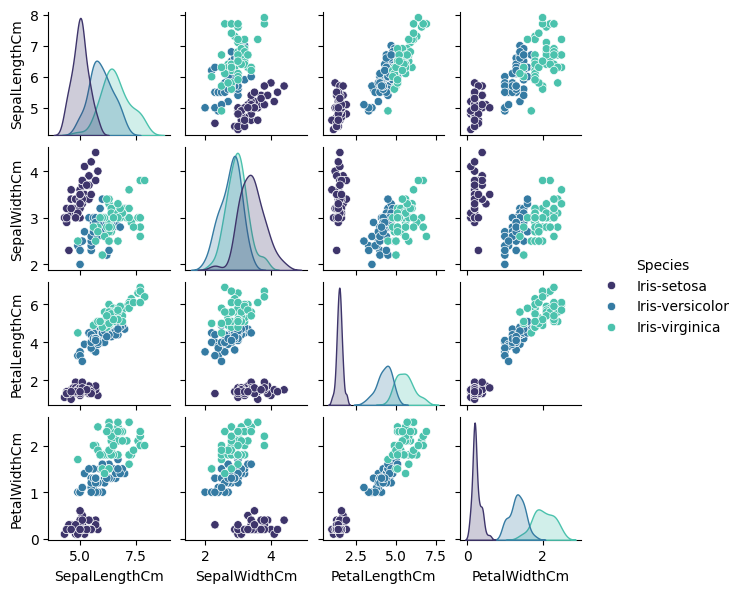

In [61]:
sns.pairplot(df.drop('Id', axis=1), hue='Species', palette='mako', height=1.5)
plt.show()

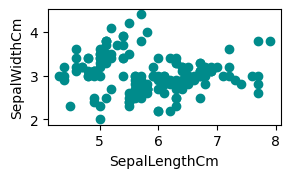

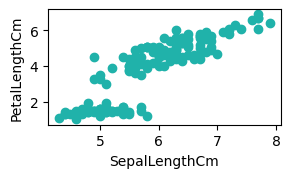

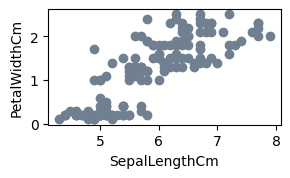

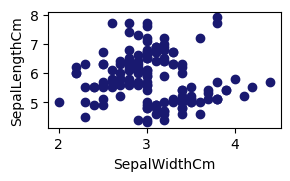

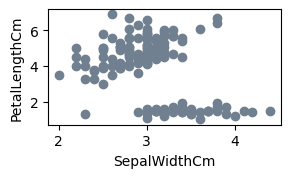

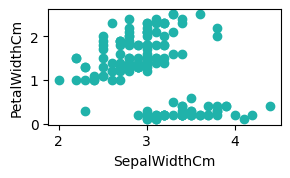

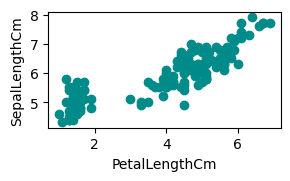

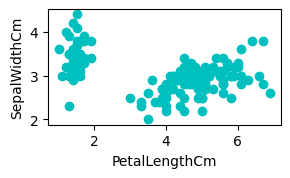

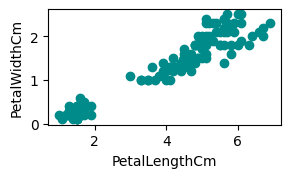

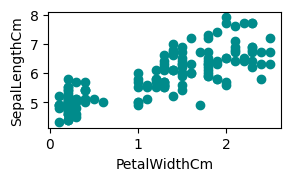

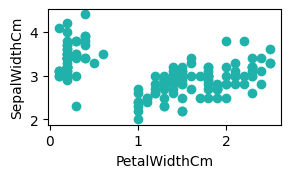

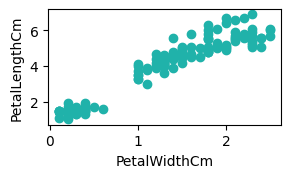

In [58]:
colors = ['c', 'lightseagreen', 'midnightblue', 'darkcyan', 'slategray']
for col in df.drop(['Id', 'Species'], axis = 1):
  for second in df.drop(['Id', 'Species',col], axis = 1):
    plt.figure(figsize=(3,1.5))
    plt.scatter(df[col], df[second], color=random.choice(colors))
    plt.xlabel(col)
    plt.ylabel(second)
    plt.show()

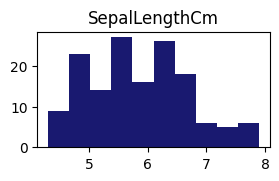

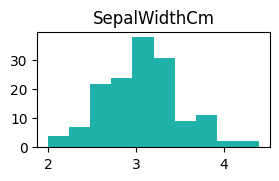

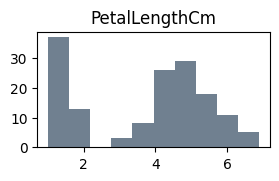

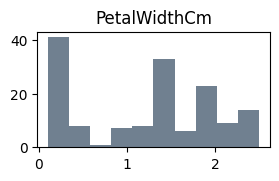

In [59]:
colors = ['c', 'lightseagreen', 'midnightblue', 'darkcyan', 'slategray']
for col in df.drop(['Id', 'Species'], axis = 1):
    plt.figure(figsize=(3,1.5))
    plt.hist(df[col], color=random.choice(colors))
    plt.title(col)
    plt.show()

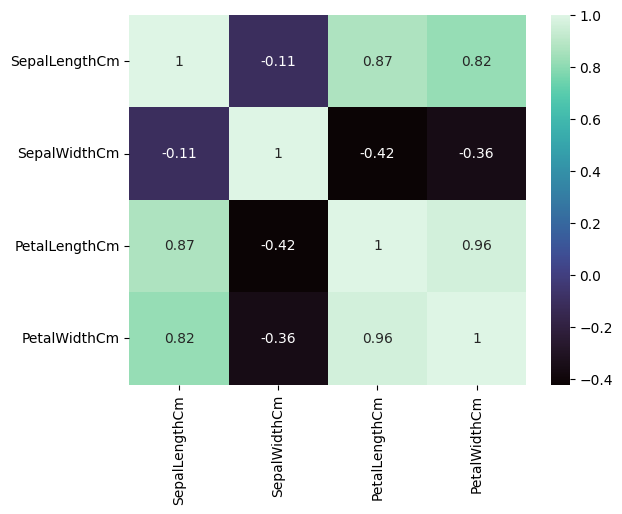

In [48]:
correlations = df.drop(['Id', 'Species'],axis=1).corr()
sns.heatmap(correlations, annot=True, cmap='spring', fmt='.2g')
plt.show()